In [1]:
from time import time

import numpy as np
import pandas as pd


# For plotting
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
train=  pd.read_csv('/content/train.csv')
test=  pd.read_csv('/content/test.csv')
import csv

with open('/content/Dig-MNIST.csv', 'r') as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        if i >= 1165:
            # Process the remaining rows
            pass

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.read_csv('/content/Dig-MNIST.csv', skiprows=1166)

In [3]:
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

print(x.shape)
print(y)

(31216, 784)
[0 1 2 ... 3 4 5]


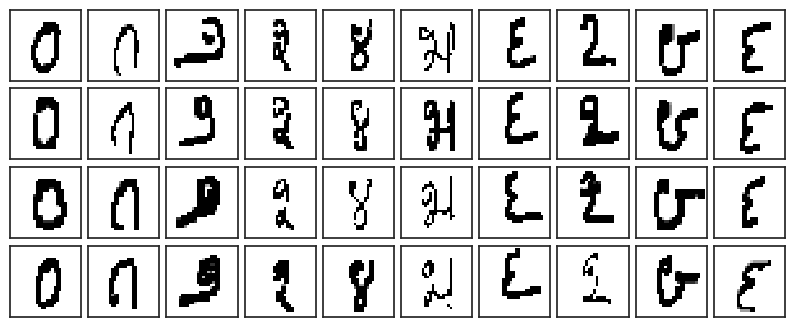

In [4]:
## Построение исходных данных обучения

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [5]:
## Стандартизация данных
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(31216, 784)


In [6]:
# t-SNE потребляет много памяти, поэтому мы будем использовать только подмножество нашего набора данных.

x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


Применение t-SNE к данным

In [7]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


Визуализация t-SNE

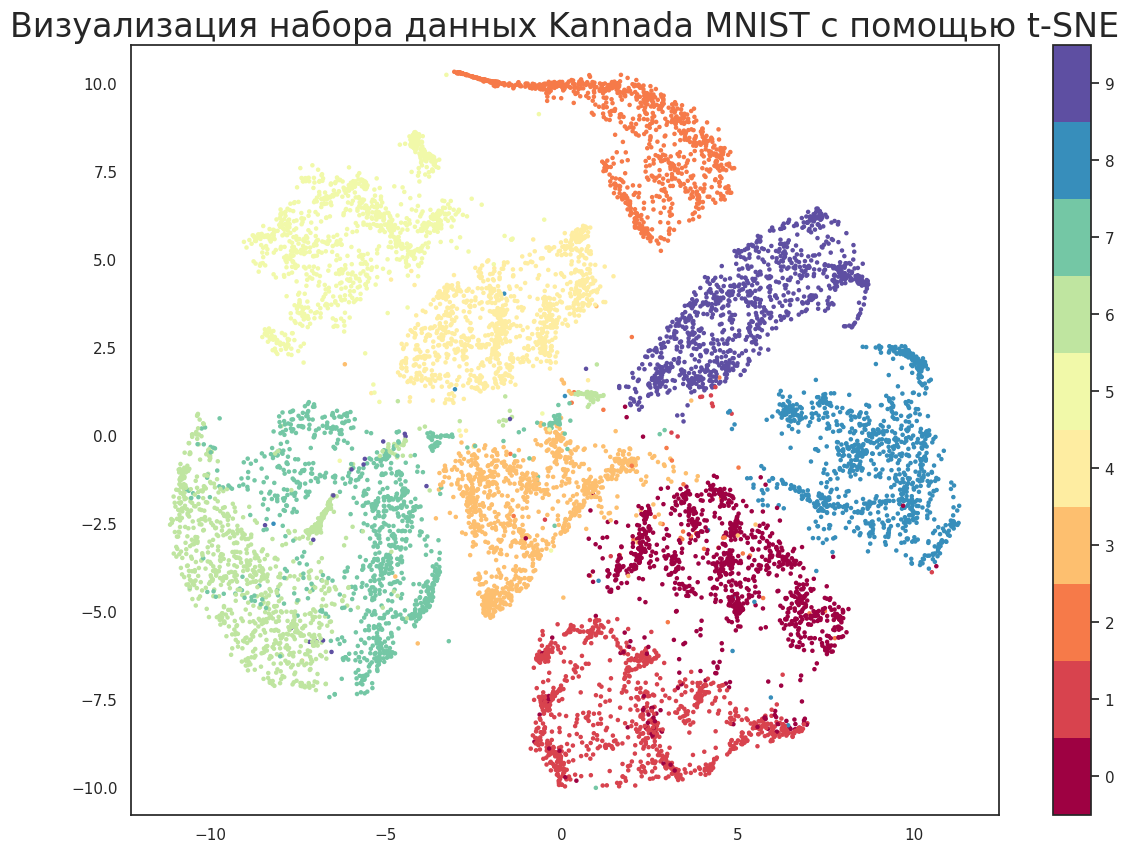

In [9]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Визуализация набора данных Kannada MNIST с помощью t-SNE', fontsize=24);

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
# Выбор оптимальных гиперпараметров для метода кластеризации
param_grid = {'n_clusters': [2, 3, 4, 5, 6]}
kmeans = KMeans()
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(train)
best_n_clusters = grid_search.best_params_['n_clusters']

In [33]:
# 2. Применение выбранного метода кластеризации
kmeans = KMeans(n_clusters=best_n_clusters)
kmeans.fit(train)
train['Cluster'] = kmeans.labels_

In [37]:
# Вывести все признаки из DataFrame
print(train.columns)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'Cluster'],
      dtype='object', length=786)


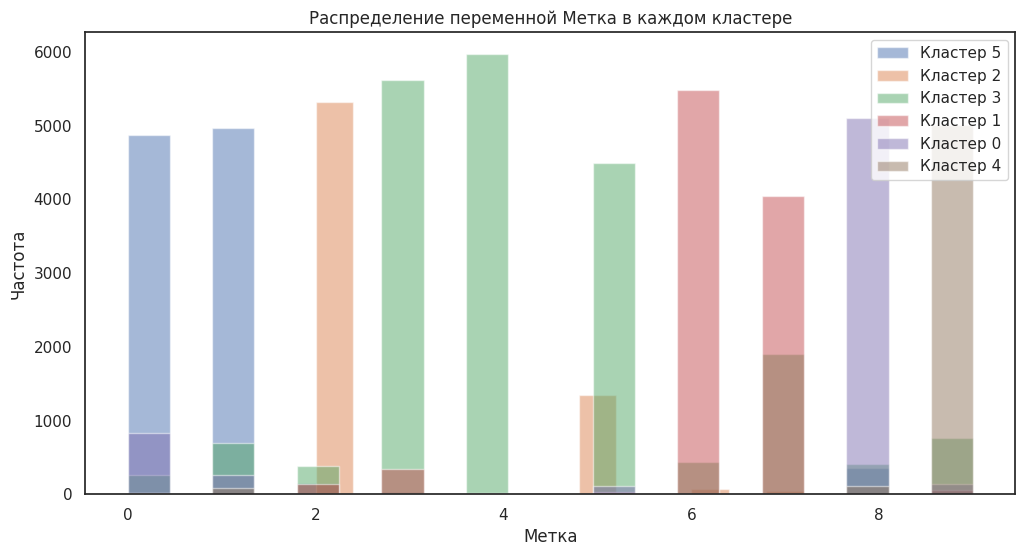

In [40]:
import matplotlib.pyplot as plt

# Гистограмма распределения целевой переменной внутри каждого кластера
plt.figure(figsize=(12, 6))
for cluster_label in train['Cluster'].unique():
    cluster_data = train[train['Cluster'] == cluster_label]
    plt.hist(cluster_data['label'], bins=20, alpha=0.5, label=f'Кластер {cluster_label}')  # Заменяем 'target' на 'label'
plt.xlabel('Метка')  # Заменяем 'Target' на 'Label'
plt.ylabel('Частота')
plt.title('Распределение переменной Метка в каждом кластере')  # Заменяем 'Target Variable' на 'Label Variable'
plt.legend()
plt.show()


**На основе анализа гистограммы можно сделать выводы о том, как различаются целевые переменные в разных кластерах. Например, если мы наблюдаем существенные различия в распределении целевой переменной между кластерами, это может указывать на значимую связь между кластерами и целевой переменной.**